## Analyze contacts data

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
df = pd.read_csv("../generated/preprocess/summary_pdb.tsv", sep='\t')
rc = pd.read_csv("../generated/contacts/residue_contacts_all.tsv", sep='\t')

In [265]:
df.head(3).T

,0,1,2
pdb,8veb,8ved,8vee
Hchain,G,H,H
Lchain,I,L,L
model,0,0,0
antigen_chain,E,A,A
antigen_type,protein,protein,protein
antigen_het_name,NaN,NaN,NaN
antigen_name,hemagglutinin,hemagglutinin,hemagglutinin
short_header,IMMUNE SYSTEM/VIRAL PROTEIN,IMMUNE SYSTEM/VIRAL PROTEIN,IMMUNE SYSTEM/VIRAL PROTEIN
date,03/19/25,03/19/25,03/19/25


There is a strong correlation between species and method. Needs to be taken into account. If we observe difference between species, this might be due to difference in methods.

In [266]:
pd.crosstab(df["species"], df["method"])

method,ELECTRON MICROSCOPY,X-RAY DIFFRACTION
species,,
Homo Sapiens,36,357
Influensa A,38,59
SARS-CoV-2,243,217


In [267]:
rc.head(3).T

,0,1,2
pdb_id,3hi6,3hi6,3hi6
chain_type,heavy,heavy,heavy
ab_chain,H,H,H
ab_resnum,1,2,3
ab_icode,,,
ab_resname,GLU,VAL,GLN
natomcontacts,0.0,0.0,0.0
nrescontacts,0.0,0.0,0.0
contact,0.0,0.0,0.0
ab_res,1,2,3


First add the `species` and `method` columns from `df` to `rc` using `merge`. 

- use `rc`as left data frame, and `df`as right data frame
- which column(s) in the left and right data frame contain the id on which we want to join?
  `left_on = "pdb_id", right_on = "pdb"`
- select only the necessary columns from `right`
- what kind of join do we want to perform?  `how = "inner"`



In [268]:
m = rc.merge(df.get(["pdb", "species", "method"]), 
             how = "left", 
             left_on = "pdb_id", 
             right_on = "pdb")

m.head()

,pdb_id,chain_type,ab_chain,ab_resnum,ab_icode,ab_resname,natomcontacts,nrescontacts,contact,ab_res,pdb,species,method
0,3hi6,heavy,H,1,,GLU,0.0,0.0,0.0,1,3hi6,Homo Sapiens,X-RAY DIFFRACTION
1,3hi6,heavy,H,2,,VAL,0.0,0.0,0.0,2,3hi6,Homo Sapiens,X-RAY DIFFRACTION
2,3hi6,heavy,H,3,,GLN,0.0,0.0,0.0,3,3hi6,Homo Sapiens,X-RAY DIFFRACTION
3,3hi6,heavy,H,4,,LEU,0.0,0.0,0.0,4,3hi6,Homo Sapiens,X-RAY DIFFRACTION
4,3hi6,heavy,H,5,,LEU,0.0,0.0,0.0,5,3hi6,Homo Sapiens,X-RAY DIFFRACTION


### Look at CDR loops

contact propensity = (# times residue appears in contact) / (# times residue appears in loop)

Create barplots of `ab_resnum` vs `contact` for regions around CDR regions for heavy and light chain. Use a different color (hue) for the three species.

You can find the CDR regions at http://www.bioinf.org.uk/abs/info.html 


Text(0.5, 1.02, 'H1')

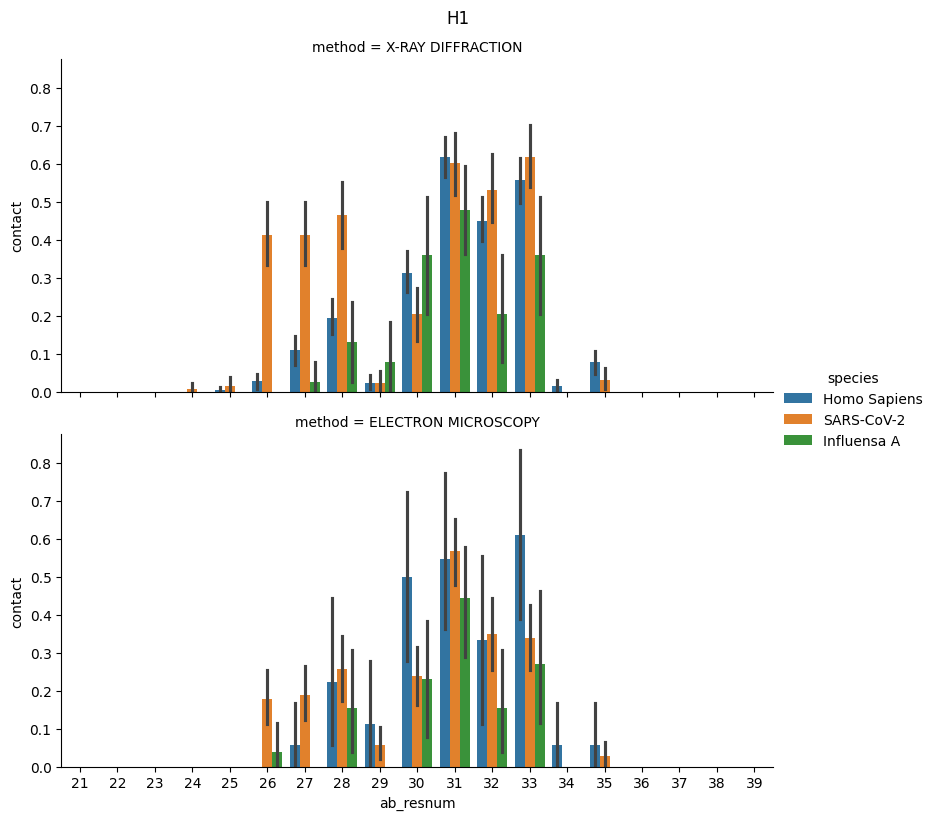

In [269]:
g = sns.catplot(data = m.query("chain_type == 'heavy' and 20 < ab_resnum < 40"), 
            x = "ab_resnum", 
            y = "contact",
            kind = "bar",
            hue = "species",
            row = "method",
            errorbar = ("ci", 95),
            height = 4, aspect = 2)

g.fig.suptitle("H1", y=1.02) 



Text(0.5, 1.02, 'H2')

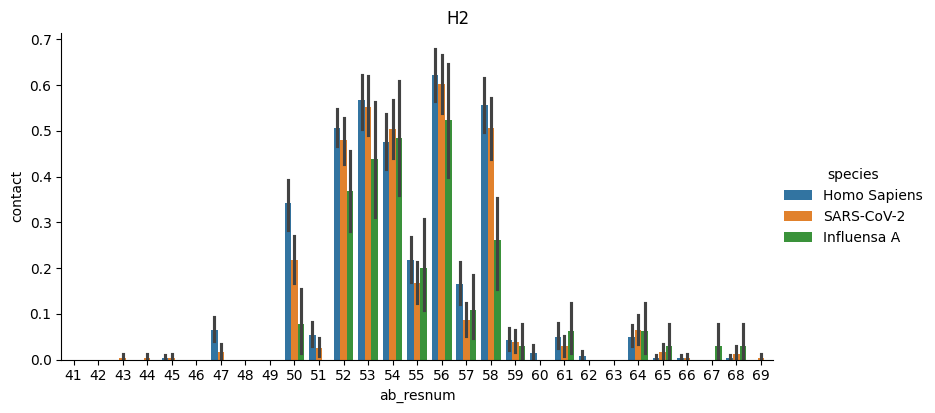

In [169]:
g = sns.catplot(data = m.query("chain_type == 'heavy' and 40 < ab_resnum < 70"), 
            x = "ab_resnum", 
            y = "contact",
            hue = "species",
            kind = "bar",
            height = 4, aspect = 2)

g.fig.suptitle("H2", y=1.02) 

Text(0.5, 1.0, 'H3')

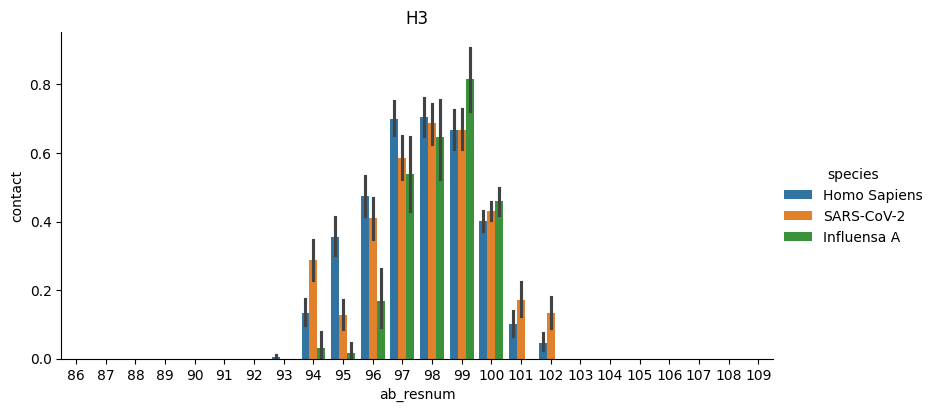

In [10]:
sns.catplot(data = m.query("chain_type == 'heavy' and 85 < ab_resnum < 110"), 
            x = "ab_resnum", 
            y = "contact",
            hue = "species",
            kind = "bar",
            height = 4, aspect = 2)
plt.title("H3")

Text(0.5, 1.0, 'L1')

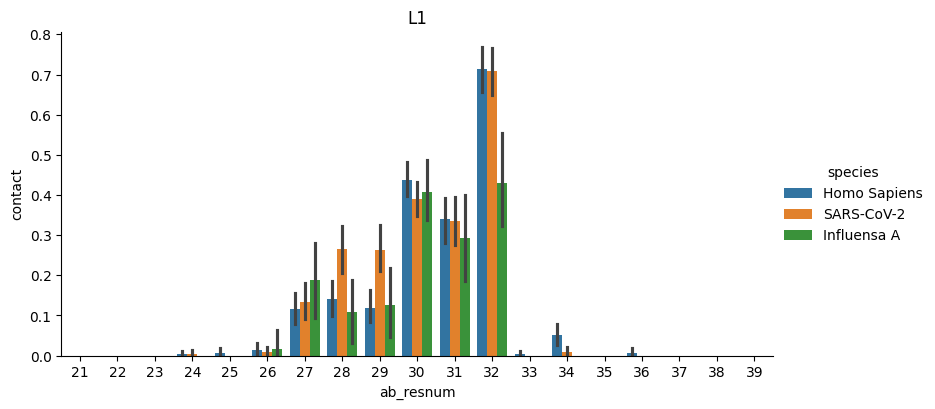

In [11]:
sns.catplot(data = m.query("chain_type == 'light' and 20 < ab_resnum < 40"), 
            x = "ab_resnum", 
            y = "contact",
            kind = "bar",
            hue = "species",
            height = 4, aspect = 2)
plt.title("L1")

Text(0.5, 1.0, 'L2')

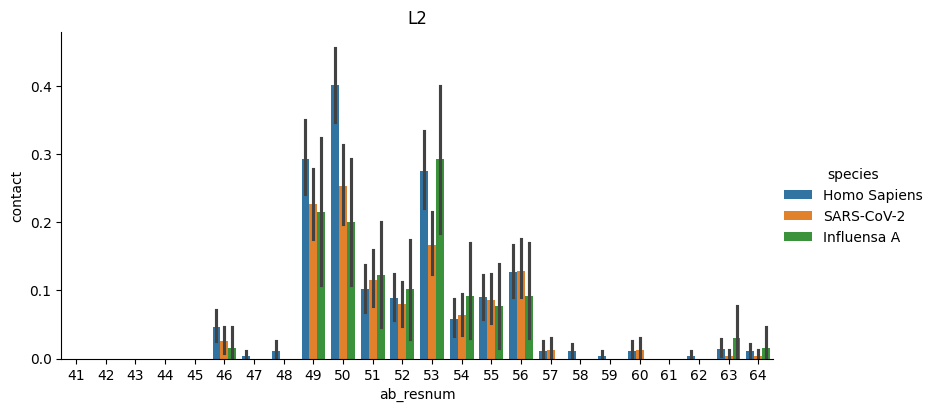

In [165]:
sns.catplot(data = m.query("chain_type == 'light' and 40 < ab_resnum < 65"), 
            x = "ab_resnum", 
            y = "contact",
            kind = "bar",
            hue = "species",
            errorbar=("ci", 95),
            height = 4, aspect = 2)
plt.title("L2")

Text(0.5, 1.0, 'L3')

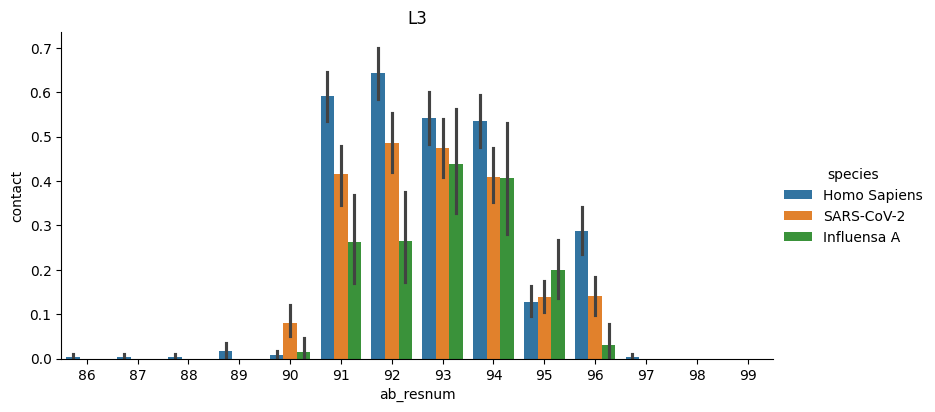

In [13]:
sns.catplot(data = m.query("chain_type == 'light' and 85 < ab_resnum < 100"), 
            x = "ab_resnum", 
            y = "contact",
            kind = "bar",
            hue = "species",
            height = 4, aspect = 2)
plt.title("L3")

Based on the plots above, how would you define the CDR regions?

L1: 27-32
L2: 49-56
L3: 91-96
H1: 26-35
H2: 50-58
H3: 94-102

Now we want to annotate our contact data with these CDRs

In [270]:
def annotate_cdr(chain_type, resnum):
    
    if chain_type == 'heavy':

        if 26 <= resnum <= 35:
            return "H1"
        elif 50 <= resnum <= 58:
            return "H2"
        elif 94 <= resnum <= 102:
            return "H3"
        else:
            return "FR"
        
    elif chain_type == 'light':

        if 27 <= resnum <= 32:
            return "L1"
        elif 49 <= resnum <= 56:
            return "L2"
        elif 91 <= resnum <= 96:
            return "L3"
        else:
            return "FR"

Here we need `apply(lambda x: ..., axis = 1)` as we want to pass the whole rows as `x`, not columns.  

In [271]:
m["CDR"] = m.apply(lambda x: annotate_cdr(x["chain_type"], x["ab_resnum"]), axis = 1)

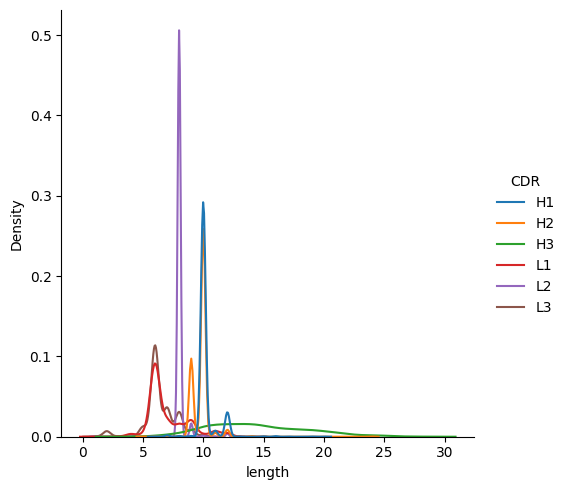

In [241]:
cdrsizes = (m
 .groupby(["pdb_id", "CDR"])
 .agg(length = ("contact", "size"))
 .reset_index()
)

sns.displot(cdrsizes.query("CDR!='FR'"), 
            x = "length", 
            hue = "CDR", 
            kind = "kde") #cdrsizes

H26-28 show much increased contact propensity for SArs vs others. What is the amino acid distribution?

Text(0.5, 1.0, 'number of residues at heavy chain 26-28')

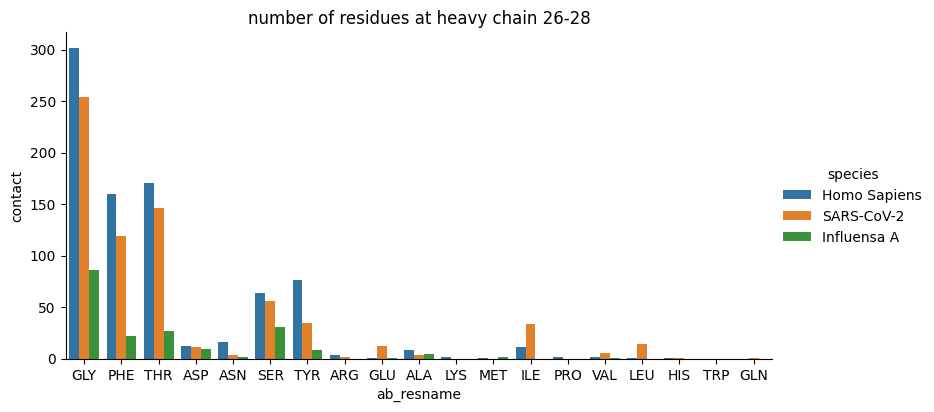

In [167]:
sns.catplot(m.query("CDR == 'H1' and 26 <= ab_resnum <= 28"),
            x = "ab_resname",
            y = "contact",
            hue = "species",
            kind = "bar",
            estimator = "size",
            height = 4, aspect = 2)
plt.title("number of residues at heavy chain 26-28")

Text(0.5, 1.0, 'mean contact fraction at heavy chain 26-28')

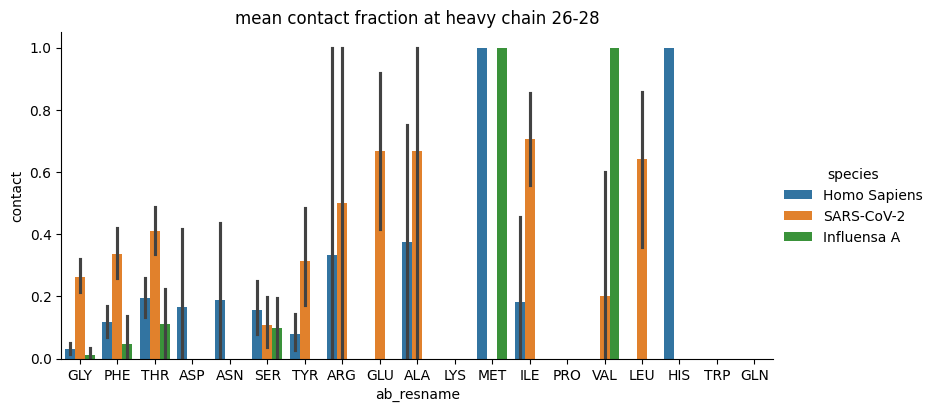

In [168]:
sns.catplot(m.query("CDR == 'H1' and 26 <= ab_resnum <= 28"),
            x = "ab_resname",
            y = "contact",
            hue = "species",
            kind = "bar",
            estimator = "mean",
            height = 4, aspect = 2)

plt.title("mean contact fraction at heavy chain 26-28")

### Amino acid composition of CDR residues

In [ ]:
aacounts = (m
            .query("CDR != 'FR'")
            .groupby(["ab_resnum", "ab_resname", "CDR"])
            .size()
            .unstack("ab_resname")
            .fillna(0))

#aacounts["freq"] = aacounts.groupby("ab_resnum")["count"].transform(lambda x: x / x.sum())
freq_prop =aacounts.div(aacounts.sum(axis=1), axis=0)

<Axes: xlabel='ab_resnum-CDR', ylabel='ab_resname'>

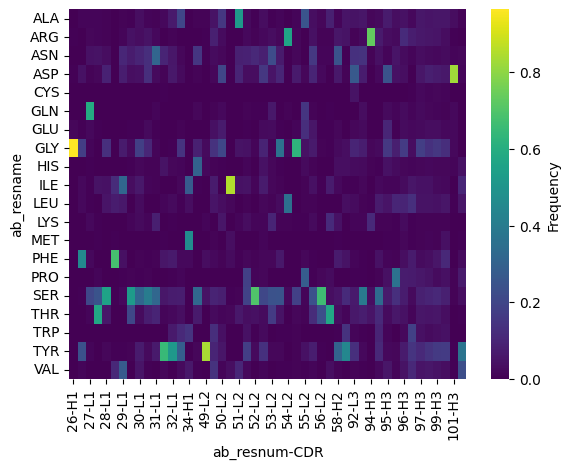

In [136]:
sns.heatmap(freq_prop.T, cmap="viridis", cbar_kws={"label": "Frequency"})

### Contact propensity of amino acids by antigen species



To check differences in contact propensity of amino acids by antigen species, we use a barplot (`catplot(..., kind = "bar")`)


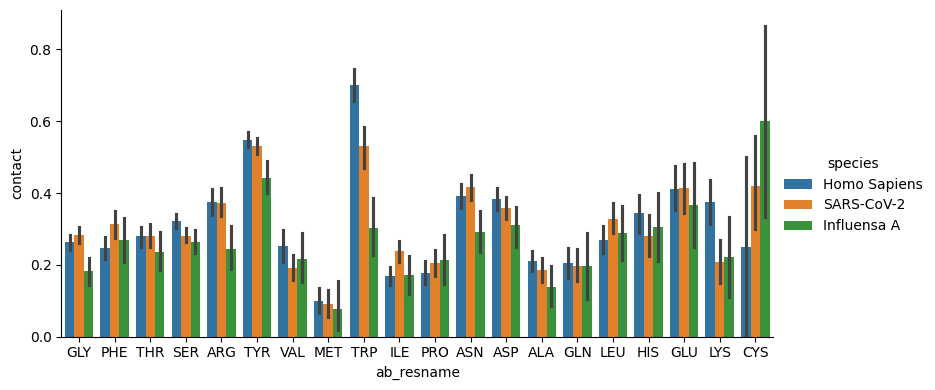

In [272]:
sns.catplot(data = m.query("CDR != 'FR'"), 
            x = "ab_resname", 
            y = "contact",
            hue = "species",
            errorbar = ("ci", 95),
            kind = "bar",
            height = 4, aspect = 2)

We can observe clear differences between the species. But we need to validate that using a statistical test. The appropriate statistical test for a barplot is the chisquare test.

The chisquare test requires a contingency table as input.

The table has one row per ab_resname, and six columns (ncontacts and nnoncontacts for each species).


In [66]:
m.head(3).T

,0,1,2
pdb_id,3hi6,3hi6,3hi6
chain_type,heavy,heavy,heavy
ab_chain,H,H,H
ab_resnum,1,2,3
ab_icode,,,
ab_resname,GLU,VAL,GLN
natomcontacts,0.0,0.0,0.0
nrescontacts,0.0,0.0,0.0
contact,0.0,0.0,0.0
ab_res,1,2,3


In [35]:
tbl = (m
       .query("CDR != 'FR'")
       .groupby(["ab_resname", "species"])
       .agg(ncontacts = ("contact", "sum"),
            nnoncontacts = ("contact", lambda x: len(x) - sum(x)))
        .unstack("species")     )
    
tbl.head()

ncontacts                        nnoncontacts              \
species    Homo Sapiens Influensa A SARS-CoV-2 Homo Sapiens Influensa A   
ab_resname                                                                
ALA               165.0        21.0      110.0        617.0       132.0   
ARG               257.0        47.0      219.0        428.0       145.0   
ASN               321.0        76.0      311.0        500.0       184.0   
ASP               375.0        83.0      324.0        605.0       185.0   
CYS                 3.0         9.0       21.0          9.0         6.0   

                       
species    SARS-CoV-2  
ab_resname             
ALA             486.0  
ARG             368.0  
ASN             436.0  
ASP             583.0  
CYS              29.0

In [19]:
from scipy.stats import chi2_contingency
chi2_stat, p, dof, expected = chi2_contingency(tbl.to_numpy())

chi2_stat, p, dof

(np.float64(2101.4185731363827), np.float64(0.0), 95)

As expected, the difference is highly significant (p-value given as 0, so it is very small).


Now let's test single amino acids. Here we need to pass in a contingency table for a given amino acid.

In [34]:
tbl2 = (m
       .query("CDR != 'FR'")
       .groupby(["ab_resname", "species"])
       .agg(ncontacts = ("contact", "sum"),
            nnoncontacts = ("contact", lambda x: len(x) - sum(x)))
         )
    
tbl2.head()

ncontacts  nnoncontacts
ab_resname species                              
ALA        Homo Sapiens      165.0         617.0
           Influensa A        21.0         132.0
           SARS-CoV-2        110.0         486.0
ARG        Homo Sapiens      257.0         428.0
           Influensa A        47.0         145.0

If we only pass the outer index to `.loc`, we get a data frame with the inner index as desired.

In [33]:
tbl2.loc["TYR"]

,ncontacts,nnoncontacts
species,,
Homo Sapiens,1069.0,878.0
Influensa A,205.0,258.0
SARS-CoV-2,845.0,747.0


In [286]:
from scipy.stats import chi2_contingency
chi2_stat, p, dof, expected = chi2_contingency(tbl.loc["TRP"].to_numpy())

chi2_stat, p, dof

(np.float64(65.7727558085714), np.float64(5.2194837087068025e-15), 2)

### Propensity of amino acid contacts by chain type

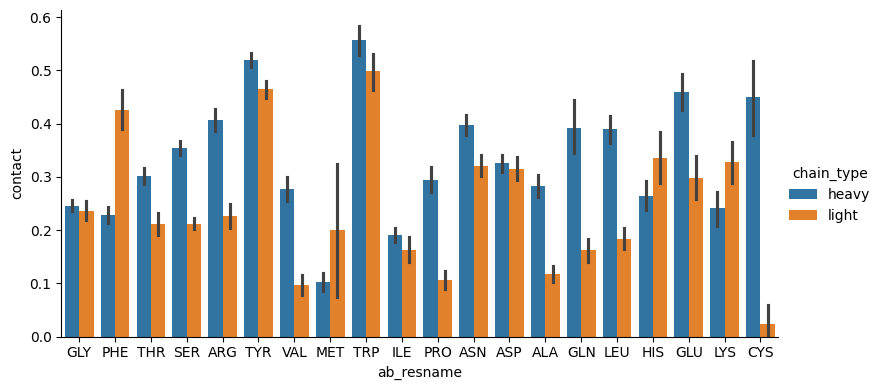

In [143]:
sns.catplot(data = m.query("CDR != 'FR'"), 
            x = "ab_resname", 
            y = "contact",
            hue = "chain_type",
            kind = "bar",
            estimator = "mean",
            height = 4, aspect = 2)

Test for significant differences in amino acid contact propensity between heavy and light chains using a chisquare test.

In [288]:
tbl = (m
    .query("CDR != 'FR'")
    .groupby(["ab_resname", "chain_type"])  # this will be index
    .agg(ncontacts = ("contact", "sum"),    # ncontacts and nnoncontacts will be columns
        nnoncontacts = ("contact", lambda x: len(x) - sum(x)))
    .unstack("chain_type")                  # move chain_type into columns 
)

tbl

ncontacts         nnoncontacts        
chain_type     heavy   light        heavy   light
ab_resname                                       
ALA            488.0   223.0       1235.0  1675.0
ARG            936.0   326.0       1361.0  1112.0
ASN            905.0   698.0       1378.0  1484.0
ASP           1154.0   513.0       2387.0  1117.0
CYS             95.0     2.0        116.0    81.0
GLN            142.0   206.0        221.0  1064.0
GLU            401.0   142.0        472.0   335.0
GLY           1532.0   441.0       4699.0  1423.0
HIS            291.0   134.0        811.0   265.0
ILE            559.0   159.0       2376.0   815.0
LEU            531.0   258.0        829.0  1152.0
LYS            178.0   181.0        561.0   372.0
MET            124.0     8.0       1091.0    32.0
PHE            739.0   257.0       2507.0   347.0
PRO            410.0   143.0        983.0  1206.0
SER           2036.0  1381.0       3711.0  5123.0
THR           1002.0   328.0       2326.0  1229.0
TRP            713.0   375.0        566.0   378.0
TYR           2956.0  1658.0       2732.0  1911.0
VAL            476.0    90.0       1242.0   845.0

In [291]:
from scipy.stats import chi2_contingency
chi2_stat, p, dof, expected = chi2_contingency(tbl.to_numpy())
print(f"Chi2 = {chi2_stat:.2f}, p = {p:.4g}, df = {dof}")

Chi2 = 10822.17, p = 0, df = 57


### Principal component analysis

We want to do a principal component analysis of pdb_ids. We can represent each pdb_id by a multi-dimensional feature vector. As it is hard to visualize points in high dimensions, we apply PCA as a dimension reduction technique.

So we need a matrix with pdb_ids as rows and features as columns.

As features we choose the number of contacts per residue type.
We, therefore, need to group by pdb_id and ab_resname.


In [102]:
p = (m
 .query("CDR != 'FR'")
 .groupby(["pdb_id", "CDR", "ab_resname", "species", "method"]) # keep species along
 .agg(ncontacts = ("contact", "sum"))
 .unstack("ab_resname")
 .fillna(0)
)

p.head(3)

ncontacts                           \
ab_resname                                      ALA  ARG  ASN  ASP  CYS  GLN   
pdb_id CDR species      method                                                 
1adq   H1  Homo Sapiens X-RAY DIFFRACTION       0.0  0.0  0.0  1.0  0.0  0.0   
       H2  Homo Sapiens X-RAY DIFFRACTION       0.0  0.0  0.0  0.0  0.0  0.0   
       H3  Homo Sapiens X-RAY DIFFRACTION       0.0  1.0  0.0  0.0  0.0  0.0   

                                                                              \
ab_resname                                 GLU  GLY  HIS  ILE  LEU  LYS  MET   
pdb_id CDR species      method                                                 
1adq   H1  Homo Sapiens X-RAY DIFFRACTION  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
       H2  Homo Sapiens X-RAY DIFFRACTION  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
       H3  Homo Sapiens X-RAY DIFFRACTION  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                                                              
ab_resname                                 PHE  PRO  SER  THR  TRP  TYR  VAL  
pdb_id CDR species      method                                                
1adq   H1  Homo Sapiens X-RAY DIFFRACTION  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
       H2  Homo Sapiens X-RAY DIFFRACTION  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
       H3  Homo Sapiens X-RAY DIFFRACTION  0.0  0.0  1.0  0.0  0.0  1.0  1.0

In [220]:
p = (m
 .query("CDR in ['H1', 'H2', 'H3']")
 .groupby(["pdb_id", "ab_resnum", "species", "method"]) # keep species along
 .agg(ncontacts = ("contact", "mean"))
 .unstack("ab_resnum")
 .fillna(0)
)

p.head(3)

ncontacts                                \
ab_resnum                                   26   27   28   29   30   31   32    
pdb_id species      method                                                      
1adq   Homo Sapiens X-RAY DIFFRACTION       0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1h0d   Homo Sapiens X-RAY DIFFRACTION       0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1i9r   Homo Sapiens X-RAY DIFFRACTION       0.0  0.0  0.0  0.0  0.0  1.0  1.0   

                                                      ...                      \
ab_resnum                              33   34   35   ...  58   94   95   96    
pdb_id species      method                            ...                       
1adq   Homo Sapiens X-RAY DIFFRACTION  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
1h0d   Homo Sapiens X-RAY DIFFRACTION  1.0  0.0  0.0  ...  1.0  0.0  1.0  0.0   
1i9r   Homo Sapiens X-RAY DIFFRACTION  1.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   

                                                                     
ab_resnum                              97   98   99   100  101  102  
pdb_id species      method                                           
1adq   Homo Sapiens X-RAY DIFFRACTION  1.0  1.0  1.0  0.0  0.0  0.0  
1h0d   Homo Sapiens X-RAY DIFFRACTION  0.0  1.0  0.0  0.2  0.0  0.0  
1i9r   Homo Sapiens X-RAY DIFFRACTION  1.0  1.0  1.0  0.0  0.0  0.0  

[3 rows x 28 columns]

In [221]:
metadata = p.index.to_frame(index = False)
metadata

,pdb_id,species,method
0,1adq,Homo Sapiens,X-RAY DIFFRACTION
1,1h0d,Homo Sapiens,X-RAY DIFFRACTION
2,1i9r,Homo Sapiens,X-RAY DIFFRACTION
3,1iqd,Homo Sapiens,X-RAY DIFFRACTION
4,1jps,Homo Sapiens,X-RAY DIFFRACTION
...,...,...,...
572,9e6k,Homo Sapiens,ELECTRON MICROSCOPY
573,9gox,Homo Sapiens,X-RAY DIFFRACTION
574,9goy,Homo Sapiens,X-RAY DIFFRACTION
575,9gwt,Homo Sapiens,X-RAY DIFFRACTION


In [226]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(p.to_numpy())  # center & scale
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [243]:
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])

df_pca = pd.concat([df_pca, metadata], axis=1)


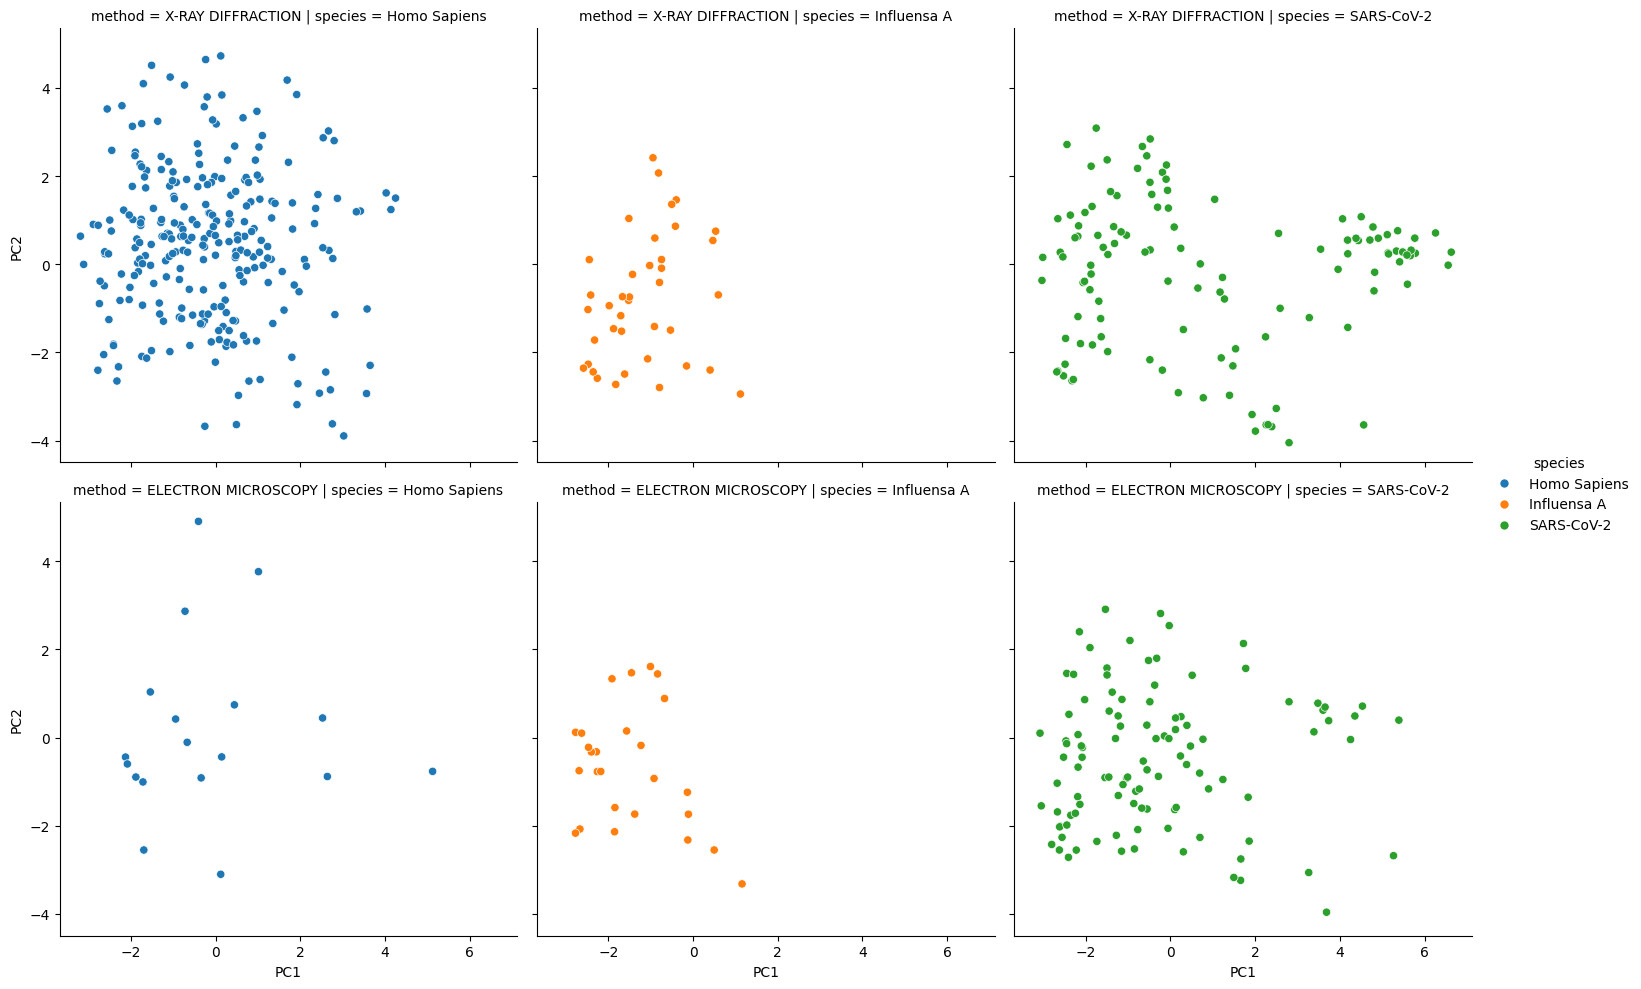

In [244]:
sns.relplot(data=df_pca, x="PC1", y="PC2", hue = "species", col = "species", row = "method")

### Correlation between contact fraction in CDRs

<Axes: ylabel='contact'>

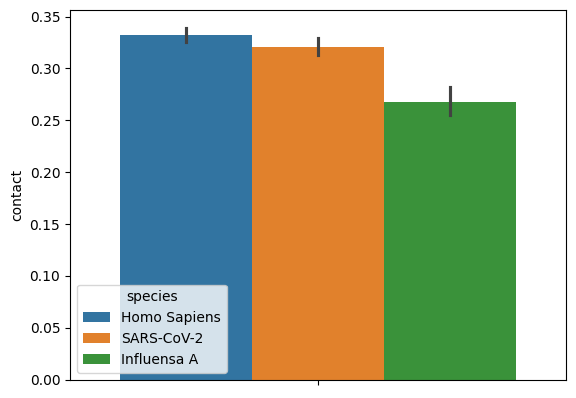

In [163]:
sns.barplot(m.query("CDR != 'FR'"), 
            #x = "CDR", 
            y = "contact", hue = "species")

<Axes: xlabel='CDR', ylabel='contact'>

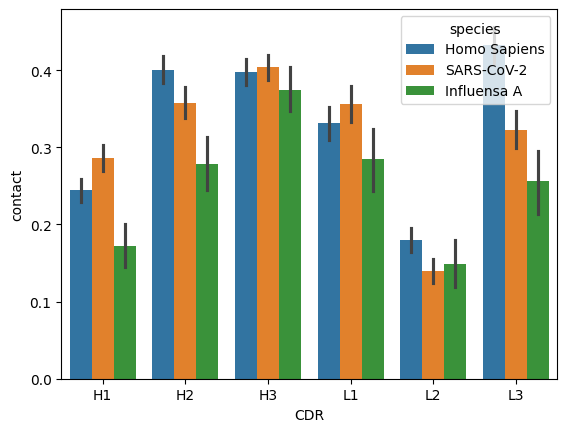

In [164]:
sns.barplot(m.query("CDR != 'FR'"), 
            x = "CDR", 
            y = "contact", hue = "species")

In [148]:
cpw = (m
.query("CDR != 'FR'")
.groupby(["pdb_id", "species", "method", "CDR"])
.agg(cp = ("contact", "mean"))
.unstack("CDR")
.get("cp")
)

cpw

,,CDR,H1,H2,H3,L1,L2,L3
pdb_id,species,method,,,,,,
1adq,Homo Sapiens,X-RAY DIFFRACTION,0.1,0.100000,0.266667,0.000000,0.250,0.000000
1h0d,Homo Sapiens,X-RAY DIFFRACTION,0.1,0.600000,0.230769,0.300000,0.000,0.833333
1i9r,Homo Sapiens,X-RAY DIFFRACTION,0.3,0.600000,0.300000,0.300000,0.000,0.500000
1iqd,Homo Sapiens,X-RAY DIFFRACTION,0.6,0.600000,0.444444,0.428571,0.375,0.833333
1jps,Homo Sapiens,X-RAY DIFFRACTION,0.4,0.500000,0.333333,0.166667,0.125,0.833333
...,...,...,...,...,...,...,...,...
9e6k,Homo Sapiens,ELECTRON MICROSCOPY,0.5,0.111111,0.666667,0.000000,0.500,0.000000
9gox,Homo Sapiens,X-RAY DIFFRACTION,0.2,0.600000,0.307692,0.000000,0.000,0.333333
9goy,Homo Sapiens,X-RAY DIFFRACTION,0.0,0.400000,0.266667,0.000000,0.000,0.666667


Can do pairplots with regression lines

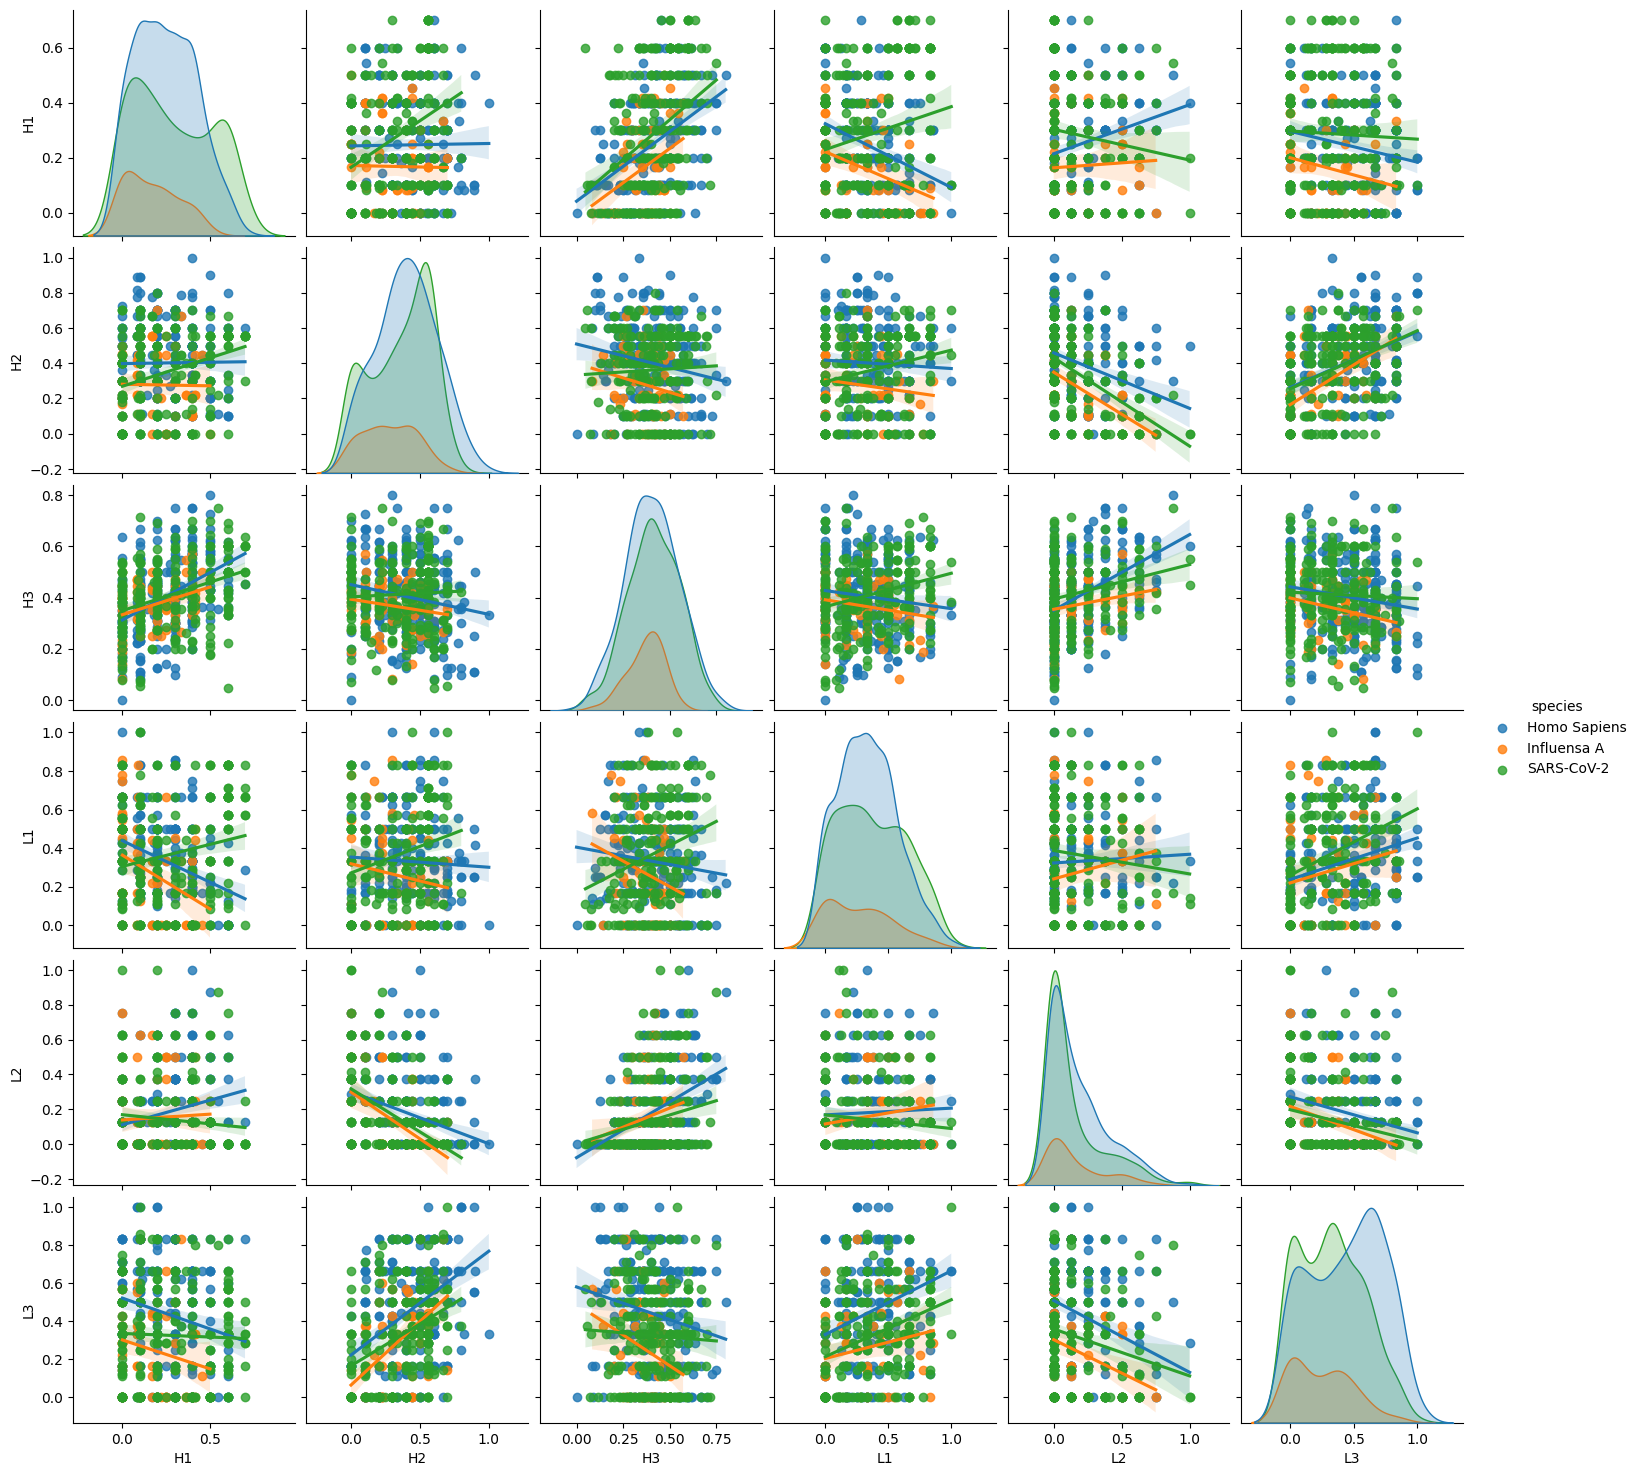

In [150]:
sns.pairplot(cpw.reset_index(), 
             vars = ["H1", "H2", "H3", "L1", "L2", "L3"], 
             kind = "reg", 
             hue = "species")

Negative correlations are interesting. Might indicate compensation mechanisms.

We can do a scatter plot with linear regression fit using `sns.lmplot`

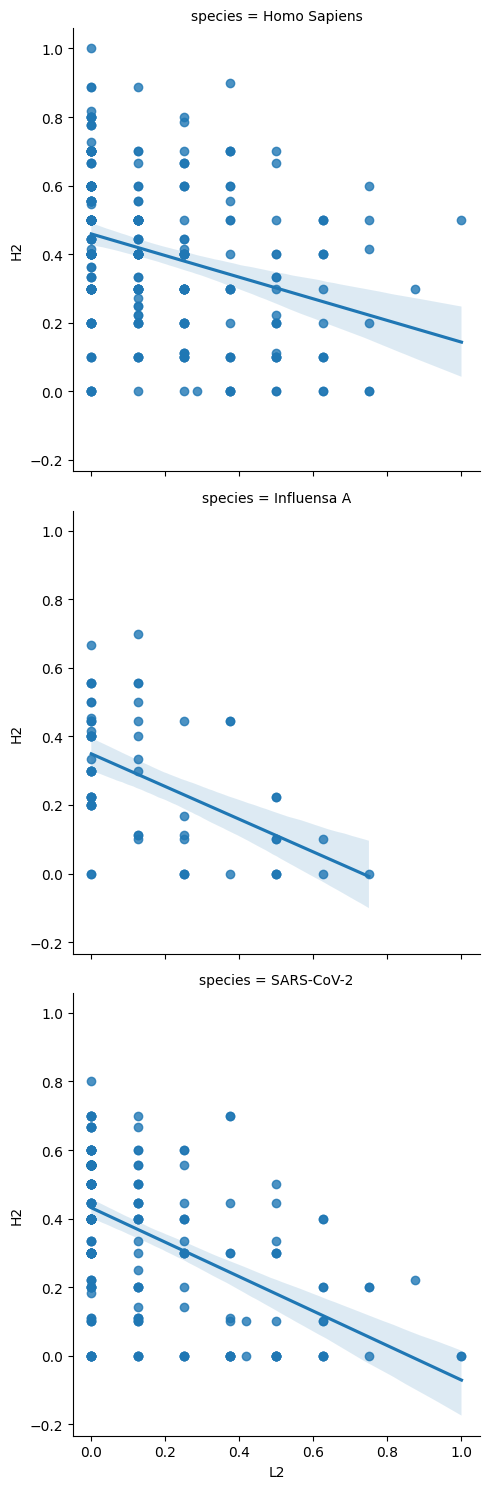

In [151]:
sns.lmplot(cpw.reset_index(), x = "L2", y = "H2", row = 'species')

If we see something interestin, need to test it. Here we test correlation between H2 and L2

In [273]:
import statsmodels.formula.api as smf

model = smf.ols("H2 ~ L2", data = cpw.reset_index()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     H2   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           5.29e-22
Time:                        15:43:36   Log-Likelihood:                 103.58
No. Observations:                 576   AIC:                            -203.2
Df Residuals:                     574   BIC:                            -194.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4351      0.011     41.312      0.000       0.414       0.456
L2            -0.3957      0.039    -10.051      0.000      -0.473      -0.318
==============================================================================
Omnibus:                        4.592   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                3.399
Skew:                           0.029   Prob(JB):                        0.183
Kurtosis:                       2.628   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

95% CI for slope of L2 is [-0.473, -0.318], significantly negative correlation (p given as 0.000, i.e. p < 5e-4)

In [153]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.4592,0.016,27.832,0.000,0.427,0.492
L2,-0.3155,0.059,-5.346,0.000,-0.432,-0.199
